In [1]:
from imtools import *

#### EX 1. Ecrire un algorithme qui permette de passer de l'image originale (simulation de l'image analogique) à une image numérique (versions sous échantillonées)

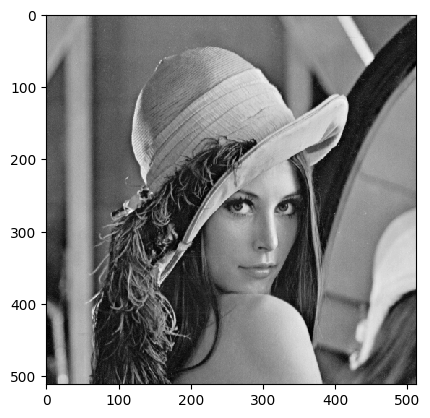

In [2]:
# open image/lena.png
img = open_image('images/lena.png')

# display image
display_image(img)

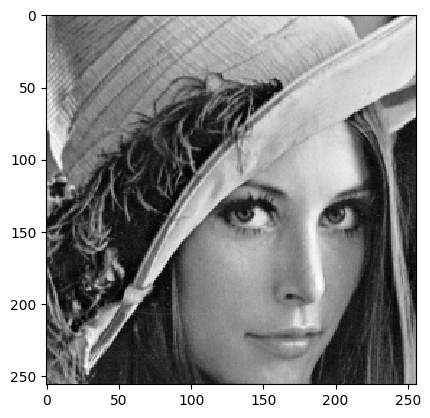

In [14]:
def sous_echantillonnage(img, x, y):
    """Returns a numpy 2D array with a subsampled image"""
    return img[img.shape[0]//2 - y//2:img.shape[0]//2 + y//2,
               img.shape[1]//2 - x//2:img.shape[1]//2 + x//2]

# display subsampled image
display_image(sous_echantillonnage(img, 256, 256))

#### EX 2. Ecrire un algorithme qui permette de passer de l'image originale précédente à ses versions répliqués

In [11]:
echantillonement = [1000, 1000]

Image constante

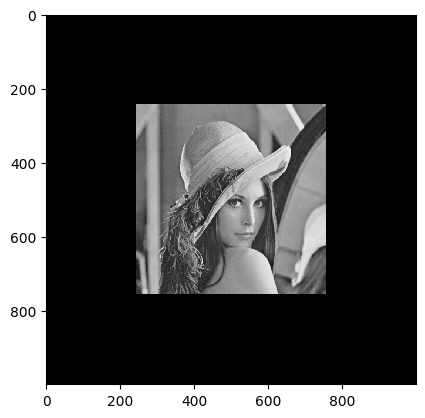

In [15]:
# place image at the center of a black image
def sur_echantillonnage_centre(img, x, y):
    """Returns a numpy 2D array with a centered image"""
    img_echantillon = np.zeros((y, x))
    img_echantillon[
        y//2-img.shape[0]//2:y//2+img.shape[0]//2,
        x//2-img.shape[1]//2:x//2+img.shape[1]//2
        ] = img
    return img_echantillon

display_image(sur_echantillonnage_centre(img, echantillonement[0], echantillonement[1]))

Prolongement pixels sur les bords

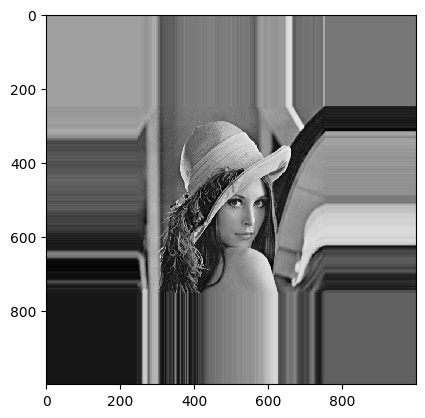

In [22]:
# Make the dark side be of the same color as the closes pixel from the centered image
def sur_echantillonnage_centre_bord(img, x, y):
    """Returns a numpy 2D array with a centered image"""
    img_echantillon = sur_echantillonnage_centre(img, x, y)
    # upper border
    img_echantillon[0:y//2-img.shape[0]//2,
                    x//2-img.shape[1]//2:x//2+img.shape[1]//2] = img[0, :]
    # lower border
    img_echantillon[y//2+img.shape[0]//2:y,
                    x//2-img.shape[1]//2:x//2+img.shape[1]//2] = img[-1, :]
    # left border
    img_echantillon[y//2-img.shape[0]//2:y//2+img.shape[0]//2,
                    0:x//2-img.shape[1]//2] = img[:, 0].reshape((img.shape[0], 1))
    # right border
    img_echantillon[y//2-img.shape[0]//2:y//2+img.shape[0]//2,
                    x//2+img.shape[1]//2:x] = img[:, -1].reshape((img.shape[0], 1))
    # angles
    img_echantillon[0:y//2-img.shape[0]//2,
                    0:x//2-img.shape[1]//2] = img[0, 0]
    img_echantillon[0:y//2-img.shape[0]//2,
                    x//2+img.shape[1]//2:x] = img[0, -1]
    img_echantillon[y//2+img.shape[0]//2:y,
                    0:x//2-img.shape[1]//2] = img[-1, 0]
    img_echantillon[y//2+img.shape[0]//2:y,
                    x//2+img.shape[1]//2:x] = img[-1, -1]
    return img_echantillon

display_image(sur_echantillonnage_centre_bord(img, echantillonement[0], echantillonement[1]))

Prolongement de l'image par parité et périodicité

In [24]:
def sur_echantillonnage_centre_parite(img, x, y):
    """Returns a numpy 2D array with a centered image and parity images around"""
    


display_image(sur_echantillonnage_centre_parite(img, echantillonement[0], echantillonement[1]))

ValueError: could not broadcast input array from shape (512,512) into shape (244,512)